# Aggregate outcomes and produce flatmap plots. 

In [1]:
%load_ext autoreload

%autoreload 2
from vicsompy.aggregate import Aggregator

from vicsompy.subject import HcpSubject
from vicsompy.modeling import MssCf
from vicsompy.surface import CiftiHandler
import cortex
import numpy as np
from scipy import stats
mh=CiftiHandler()
from vicsompy.vis import Plot
from vicsompy.utils import load_pkg_yaml, load_plot_pkg_yaml
import os
from scipy.stats import t as tdist

plotviews=load_plot_pkg_yaml()['plotviews']

## Resting state effect sizes. (Figure 1.)

In [2]:
# Create an instance of the Aggregator class for the 'rs' experiment with analysis name 'TEST_REST' and aggregator name 'newagg'
myagg_rest=Aggregator(expt_id='rs',analysis_name='TEST_REST',agg_name='newagg')

# Load all subject frames into the aggregator instance
myagg_rest.load_all_sub_frames(myagg_rest.all_subjects)

# Calculate the difference between 'test_scores_somato_score' and 'null_score_somato' for each frame in the aggregator instance and store the results in an array called topsom
topsom=np.array([frame['test_scores_somato_score']-frame['null_score_somato'] for frame in myagg_rest.frames]) 

# Perform a one-sample t-test on topsom with a population mean of 0 and store the t-statistic and p-value in test_topsom
test_topsom=stats.ttest_1samp(topsom, popmean=0)

# Decompose the t-statistic into its data and standard error components and store the data component in t
t,s=mh.decompose_data(test_topsom[0])

adding rois
** (org.inkscape.Inkscape:1648026): WARNING **: 14:18:29.176: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1648312): WARNING **: 14:18:32.887: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1648511): WARNING **: 14:18:36.463: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1648627): WARNING **: 14:18:40.801: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)


<Figure size 3600x1800 with 0 Axes>

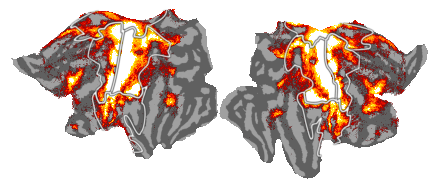

In [3]:
# Calculate the effect size (Cohen's d) by dividing the standard error by the square root of the number of samples
d=t/np.sqrt(topsom.shape[0])

# Create an instance of the Plot class with the plotviews['dstat_som_rest'] configuration
mp=Plot(**plotviews['dstat_som_rest'])

# Generate the plot using d as the data for the first plot and d as the data for the second plot and store the result in F1_e
F1_e=mp.uber_plot(dat=d,dat2=d)

mp.outname='Figure_1e.png'
mp.outpath=load_pkg_yaml()['paths']['plot_out']
mp.saveout()

## Thresholded resting-state somatotopy data. (Figure 1)

In [8]:
# Calculate the p-value for the t-statistic using the t-distribution and store the result in pval
critical_t_value=tdist.ppf(1-0.05/2, topsom.shape[0]-1)

adding rois
** (org.inkscape.Inkscape:1300476): WARNING **: 12:30:27.595: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1300728): WARNING **: 12:30:31.304: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1301033): WARNING **: 12:30:35.348: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1301299): WARNING **: 12:30:39.154: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)


<Figure size 1800x900 with 0 Axes>

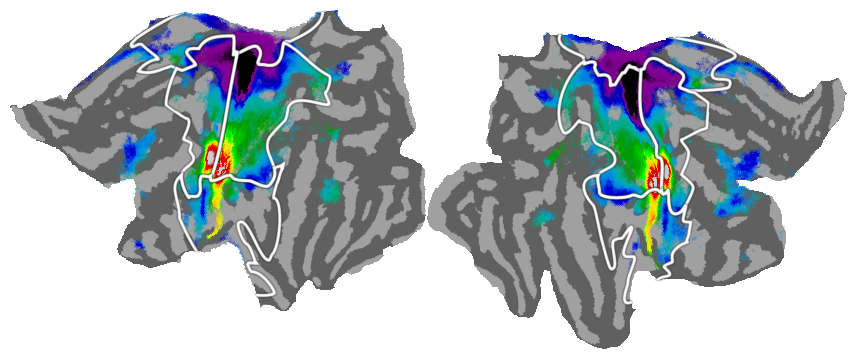

In [9]:

# Calculate the average frame for the aggregator instance myagg_rest
myagg_rest.make_average()

# Extract the 'spliced_params_inflated_dist_somato' column from the average frame and decompose the data
bmap_rest,_=mh.decompose_data(myagg_rest.av_frame['spliced_params_inflated_dist_somato'])

# Initialize the Plot instance with the 'rest_bmap' configuration from plotviews
mp=None
mp=Plot(**plotviews['rest_bmap'])

# Generate the plot using bmap_rest as the data for the first plot and t as the data for the second plot and store the result in F1_e
F1_e=mp.uber_plot(dat=bmap_rest,dat2=t)
mp.outname='Figure_1f.png'
mp.outpath=load_pkg_yaml()['paths']['plot_out']
mp.saveout()



## Movie v Rest (Figure 2)

adding rois
** (org.inkscape.Inkscape:1310208): WARNING **: 12:34:43.481: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1310568): WARNING **: 12:34:47.085: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1310991): WARNING **: 12:34:50.830: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1311276): WARNING **: 12:34:55.983: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)


<Figure size 1800x900 with 0 Axes>

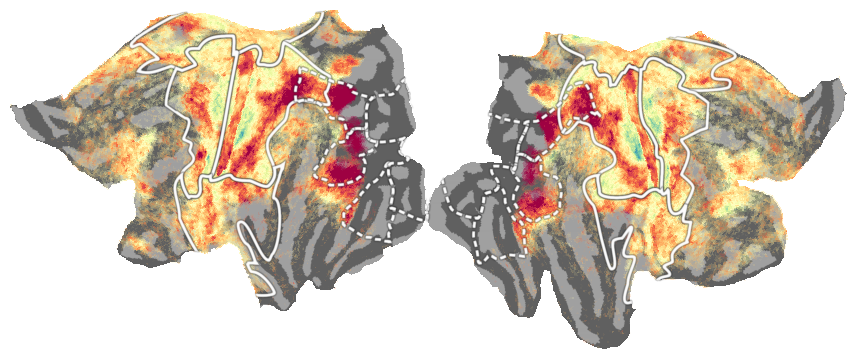

In [10]:
myagg_mov = Aggregator(expt_id='movie', analysis_name='TEST', agg_name='newagg')  # Create an instance of the Aggregator class for the 'movie' experiment with analysis name 'TEST' and aggregator name 'newagg'
myagg_mov.load_all_sub_frames(myagg_mov.all_subjects)  # Load all subject frames into the aggregator instance
topsom_movie = np.array([frame['test_scores_somato_score'] - frame['null_score_somato'] for frame in myagg_mov.frames])  # Calculate the difference between 'test_scores_somato_score' and 'null_score_somato' for each frame in the aggregator instance and store the results in an array called topsom_movie
diff_array = topsom - topsom_movie  # Calculate the difference between topsom and topsom_movie and store the results in an array called diff_array
t_diff, p_value = stats.ttest_1samp(diff_array, popmean=0)  # Perform a one-sample t-test on diff_array with a population mean of 0 and store the t-statistic and p-value in t_diff and p_value respectively
t_diff, _ = mh.decompose_data(t_diff)  # Decompose t_diff into its data and standard error components and store the data component in t_diff
t_mov, p_value = stats.ttest_1samp(topsom_movie, popmean=0)  # Perform a one-sample t-test on topsom_movie with a population mean of 0 and store the t-statistic and p-value in t_mov and p_value respectively
t_mov, _ = mh.decompose_data(t_mov)  # Decompose t_mov into its data and standard error components and store the data component in t_mov
mp = None  # Initialize mp as None
mp = Plot(**plotviews['difference'])  # Create an instance of the Plot class with the plotviews['difference'] configuration
F2_a = mp.uber_plot(dat=t_diff, dat2=t_mov)  # Generate the plot using t_diff as the data for the first plot and t_mov as the data for the second plot and store the result in F2_a
mp.outname='Figure_2a.png'
mp.outpath=load_pkg_yaml()['paths']['plot_out']
mp.saveout()

## Variance decomposition (Figure 3)

adding rois
** (org.inkscape.Inkscape:1339709): WARNING **: 12:48:02.063: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1340040): WARNING **: 12:48:05.756: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1340346): WARNING **: 12:48:09.539: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1340604): WARNING **: 12:48:13.160: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)


<Figure size 1800x900 with 0 Axes>

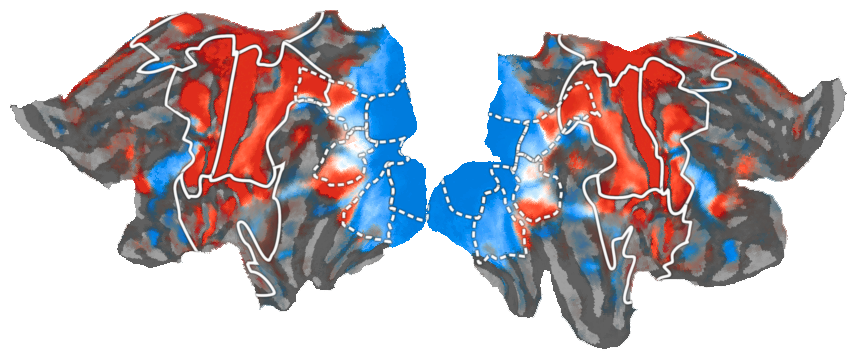

In [11]:
my_sub2=HcpSubject(subject='999999', experiment_id='movie')

# Prepare the data for the subject
my_sub2.prep_data()

# Get the output directories for the analysis
my_sub2.prepare_out_dirs('TEST')

# Create an instance of the MS_CF class with the subject
nm2=MssCf(my_sub2,'TEST')

# Load the frame for the subject
nm2.load_frame()

# Decompose the data for the somatosensory scores
som,c=mh.decompose_data(nm2.frame['test_scores_somato_score'])

# Decompose the data for the visual scores
vis,c=mh.decompose_data(nm2.frame['test_scores_visual_score'])

# Create an instance of the Plot class with the 'variance_decomp_full' plotview configuration
plot = Plot(**plotviews['variance_decomp_full'])

# Generate the plot using the decomposed data
F3_a=plot.uber_plot(dat=vis,dat2=som)
plot.outname='Figure_3a.png'
plot.outpath=load_pkg_yaml()['paths']['plot_out']
plot.saveout()

## Movie somatotopic map (Figure 4-5)

adding rois
** (org.inkscape.Inkscape:1406305): WARNING **: 13:06:09.452: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1406419): WARNING **: 13:06:12.982: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1406684): WARNING **: 13:06:16.622: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)
adding rois
** (org.inkscape.Inkscape:1406963): WARNING **: 13:06:20.374: Fonts dir '/tank/hedger/.config/inkscape/fonts' does not exist and will be ignored.
Background RRGGBBAA: ffffff00
Area 0:0:2511.29:1024 exported to 2511 x 1024 pixels (96 dpi)


<Figure size 1800x900 with 0 Axes>

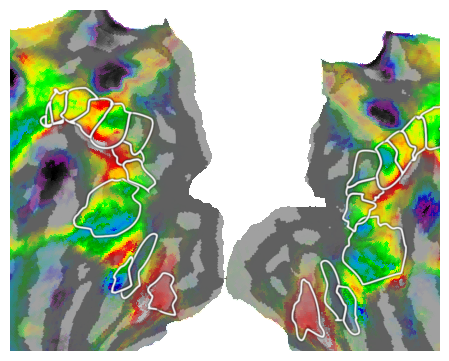

In [12]:
# Decompose the data for the somatosensory scores
bmap,c=mh.decompose_data(nm2.frame['spliced_params_inflated_dist_somato'])

# Create an instance of the Plot class with the 'variance_decomp_full' plotview configuration
plot = Plot(**plotviews['av_bmap_zoom'])

# Generate the plot using the decomposed data
F4_a=plot.uber_plot(dat=bmap,dat2=som)

plot.outname='Figure_4a.png'
plot.outpath=load_pkg_yaml()['paths']['plot_out']
plot.saveout()